# Análisis de compañías del S&P 500

En el presente informe se toma en cuenta el indice S&P500.Este índice se basa en la capitalización bursátil de 500 grandes empresas que poseen acciones que cotizan en las bolsas NYSE o NASDAQ, y captura aproximadamente el 80% de toda la capitalización de mercado.
Se realiza un análisis sobre los distintas empresas a lo largo del tiempo para comprender mejor el mercado, y poder tomar decisiones en base a nuestras recomendaciones

### Se importan las librerías a utilizar

In [1]:
import pandas as pd
import requests as r
import yfinance as yf
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np

### Se obtiene la lista de los S&P500 de Wikipedia https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
pagina= r.get(url).content
lista_datos = pd.read_html(pagina)
type(lista_datos)
datos_wiki=lista_datos[0]


In [3]:
datos_wiki.head(10)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
5,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
7,ADM,ADM,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
8,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,reports,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949


In [4]:
df_simbolos=datos_wiki.iloc[:,[0,1,3,4]]

Se conservan los datos de las columnas relevantes para este informe

In [5]:
df_simbolos

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [6]:
type(df_simbolos['Symbol'])

pandas.core.series.Series

In [7]:
#df_simbolos['Symbol']=df_simbolos['Symbol'].replace('.','-') 
df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


C:\Users\PCMYM\AppData\Local\Temp\ipykernel_12124\3270643762.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_12124\3270643762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')


In [8]:
df_simbolos.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
5,ACN,Accenture,Information Technology,IT Consulting & Other Services
6,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
7,ADM,ADM,Consumer Staples,Agricultural Products
8,ADBE,Adobe Inc.,Information Technology,Application Software
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services


In [9]:
#Se obtiene la lista de simbolos que se va a analizar
simbolos= df_simbolos['Symbol'].tolist()

In [10]:

print(simbolos)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'D

In [11]:
#Se descarga los datos de la API yahoo Finance usanado la libreria yfinance
df_data = yf.download(simbolos,start='2000-01-01',end='2020-12-31',group_by="ticker", threads=3)
df_data



[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- OGN: Data doesn't exist for startDate = 946702800, endDate = 1609390800
- CEG: Data doesn't exist for startDate = 946702800, endDate = 1609390800


ITW                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2000-01-03   30.250000   32.406250   30.187500   31.937500   19.965698   
2000-01-04   31.812500   31.843750   30.250000   30.500000   19.067045   
2000-01-05   30.500000   31.125000   30.031250   30.875000   19.301485   
2000-01-06   30.437500   30.875000   30.250000   30.656250   19.164724   
2000-01-07   31.187500   32.687500   31.125000   32.625000   20.395491   
...                ...         ...         ...         ...         ...   
2020-12-28  204.360001  205.300003  201.860001  202.380005  195.986771   
2020-12-29  203.570007  203.649994  198.820007  200.410004  194.079010   
2020-12-30  200.009995  202.720001  199.889999  202.169998  196.903458   
2020-12-31         NaN         NaN         NaN         NaN         NaN   
2001-09-12         NaN         NaN         NaN         NaN         NaN   

                             AFL                                   ...  \
               Volume       Open       High        Low      Close  ...   
Date                                                               ...   
2000-01-03  6250200.0  11.734375  11.781250  11.078125  11.187500  ...   
2000-01-04  2799600.0  10.812500  11.281250  10.812500  10.890625  ...   
2000-01-05  2350800.0  10.906250  11.046875  10.796875  10.828125  ...   
2000-01-06  2038800.0  10.781250  11.109375  10.718750  11.046875  ...   
2000-01-07  3213800.0  11.031250  11.281250  10.968750  11.265625  ...   
...               ...        ...        ...        ...        ...  ...   
2020-12-28   482100.0  44.080002  44.750000  43.910000  43.919998  ...   
2020-12-29   575300.0  44.160000  44.320000  43.700001  43.750000  ...   
2020-12-30   658200.0  43.869999  44.480000  43.830002  44.009998  ...   
2020-12-31        NaN        NaN        NaN        NaN        NaN  ...   
2001-09-12        NaN        NaN        NaN        NaN        NaN  ...   

                 INTC                                         HSIC             \
                  Low      Close  Adj Close      Volume       Open       High   
Date                                                                            
2000-01-03  41.625000  43.500000  26.234390  57710200.0   2.732843   2.732843   
2000-01-04  41.125000  41.468750  25.009356  51019600.0   2.463235   2.463235   
2000-01-05  40.250000  41.812500  25.216677  52389000.0   2.463235   2.524510   
2000-01-06  39.093750  39.375000  23.746630  55171200.0   2.500000   2.549020   
2000-01-07  38.687500  41.000000  24.726662  41096400.0   2.475490   2.598039   
...               ...        ...        ...         ...        ...        ...   
2020-12-28  46.860001  47.070000  45.176376  21269200.0  66.570000  66.900002   
2020-12-29  46.490002  49.389999  47.403042  84531400.0  66.879997  66.989998   
2020-12-30  48.560001  48.750000  46.788792  37385400.0  65.690002  66.239998   
2020-12-31        NaN        NaN        NaN         NaN        NaN        NaN   
2001-09-12        NaN        NaN        NaN         NaN        NaN        NaN   

                                                        
                  Low      Close  Adj Close     Volume  
Date                                                    
2000-01-03   2.426471   2.475490   2.475490  2159340.0  
2000-01-04   2.352941   2.352941   2.352941   928200.0  
2000-01-05   2.414216   2.500000   2.500000  2998800.0  
2000-01-06   2.450980   2.487745   2.487745  1082220.0  
2000-01-07   2.450980   2.573529   2.573529  4083570.0  
...               ...        ...        ...        ...  
2020-12-28  65.639999  66.220001  66.220001   420700.0  
2020-12-29  65.389999  65.720001  65.720001   336500.0  
2020-12-30  65.110001  65.839996  65.839996   490100.0  
2020-12-31        NaN        NaN        NaN        NaN  
2001-09-12        NaN        NaN        NaN        NaN  

[5285 rows 

Se construye un dataframe por cada activo en el cual se calcularan los indicadores necesarios.
Luego cada dataframe por activo sera almacenado en una lista par posteriomente concatenarlos en un solo DataFrame Global

In [12]:

df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()
list_tickers=[]
for i in tickers:
    df_ticker=df_data.loc[:,i]
    df_ticker.reset_index(inplace=True)
    df_ticker=df_ticker.sort_values('Date')
    df_ticker=df_ticker.assign(Ticker=i)
    #Se calcula el Retorno GAP y se agrega esa columna
    df_ticker= df_ticker.assign(GAP_Return=lambda x: np.log(x['Open']/x['Close'].shift(1)).fillna(0))
    #Se calcula el Retorno Intradiario y se agrega esa columna
    df_ticker= df_ticker.assign(Intradaily_Return=lambda x: np.log(x['Open']/x['Close']).fillna(0))
    #Se calcula la variacion y se agrega esa columna
    df_ticker=df_ticker.assign(Variation= lambda x: x['Adj Close'].pct_change())
    #Se calcula la volatibilidad y se agrega esa columna
    df_ticker= df_ticker.assign(Volatility= lambda x: x['Variation'].rolling(250).std()*100*(250)**0.5 )        
    list_tickers.append(df_ticker)

df_global=pd.concat(list_tickers)

df_global=df_global.assign(WeekDay=lambda x:x['Date'].dt.strftime('%A'))    #para conocer el dia de la semana
df_global=df_global.assign(Year_Month=lambda x:x['Date'].dt.strftime('%Y-%m'))      #para conocer el año y mes correspondiente


In [13]:
df_global

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month
0,2000-01-03,30.250000,32.406250,30.187500,31.937500,19.965698,6250200.0,ITW,0.000000,-0.054285,NaN,NaN,Monday,2000-01
1,2000-01-04,31.812500,31.843750,30.250000,30.500000,19.067045,2799600.0,ITW,-0.003922,0.042133,-0.045010,NaN,Tuesday,2000-01
2,2000-01-05,30.500000,31.125000,30.031250,30.875000,19.301485,2350800.0,ITW,0.000000,-0.012220,0.012296,NaN,Wednesday,2000-01
3,2000-01-06,30.437500,30.875000,30.250000,30.656250,19.164724,2038800.0,ITW,-0.014271,-0.007161,-0.007086,NaN,Thursday,2000-01
4,2000-01-07,31.187500,32.687500,31.125000,32.625000,20.395491,3213800.0,ITW,0.017181,-0.045061,0.064220,NaN,Friday,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,2020-12-24,66.309998,66.400002,65.250000,65.830002,65.830002,155900.0,HSIC,-0.001959,0.007265,-0.009181,44.326489,Thursday,2020-12
5280,2020-12-28,66.570000,66.900002,65.639999,66.220001,66.220001,420700.0,HSIC,0.011178,0.005271,0.005924,44.328314,Monday,2020-12
5281,2020-12-29,66.879997,66.989998,65.389999,65.720001,65.720001,336500.0,HSIC,0.009917,0.017497,-0.007551,44.331727,Tuesday,2020-12
5282,2020-12-30,65.690002,66.239998,65.110001,65.839996,65.839996,490100.0,HSIC,-0.000457,-0.002281,0.001826,44.323465,Wednesday,2020-12


In [14]:
#Se verifica que todos los REtornos GAPS inicien en cero
verificar_inicio_cero=df_global.loc[df_global.Date=='2000-01-03','GAP_Return'].sum()
verificar_inicio_cero

0.0

# Análisis del mejor día para invertir usando el rendimiento gap.
<div class="alert alert-block alert-info">
<b>
Gap: Diferencia relativa entre precios Close del día anterior y el actual (escala logarítmica).
Simula una compra al cierre de un día y venta al cierre del día siguiente.
Las distribuciones para los rendimientos son similares, por lo que se infiere que el día para la inversión no es una variable relevante en el rendimiento gap.


Se elabora un dataframe con las columnas  WeekDay y GAP_Return

In [49]:
df_retorno_gaps= pd.DataFrame()

df_retorno_gaps=df_global[['WeekDay','GAP_Return']]
df_retorno_gaps

,WeekDay,GAP_Return
0,Monday,0.000000
1,Tuesday,-0.003922
2,Wednesday,0.000000
3,Thursday,-0.014271
4,Friday,0.017181
...,...,...
5279,Thursday,-0.001959
5280,Monday,0.011178
5281,Tuesday,0.009917
5282,Wednesday,-0.000457


In [43]:
df_Retorno_Gaps = df_global[['WeekDay','Ticker','GAP_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Gaps.reset_index(inplace=True)
df_Retorno_Gaps

,WeekDay,Ticker,GAP_Return
0,Friday,A,-0.360434
1,Friday,AAL,0.505713
2,Friday,AAP,0.391958
3,Friday,AAPL,-0.547687
4,Friday,ABBV,0.287896
...,...,...,...
2510,Wednesday,YUM,-0.425206
2511,Wednesday,ZBH,-0.142592
2512,Wednesday,ZBRA,-0.727324
2513,Wednesday,ZION,0.001458


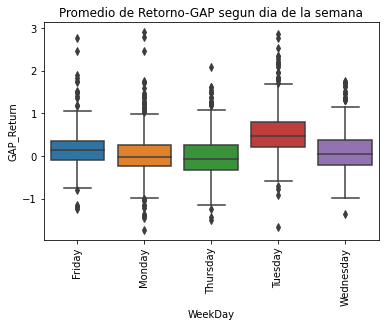

In [45]:
sns.boxplot(data =df_Retorno_Gaps,x='WeekDay',y='GAP_Return')
plt.xticks(rotation=90)
plt.title('Promedio de Retorno-GAP segun dia de la semana')  
plt.show()

In [16]:
dia_inversion_gap=df_retorno_gaps.groupby(['WeekDay']).mean()
#dia_inversion.reset_index(inplace=True)
dia_inversion_gap

,GAP_Return
WeekDay,
Friday,0.000155
Monday,0.000028
Thursday,-0.000007
Tuesday,0.000502
Wednesday,0.000097


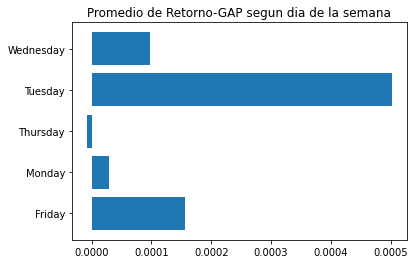

In [50]:
plt.figure()                                #Figura 
x_values1 = dia_inversion_gap.index.tolist()
y_values1 = dia_inversion_gap.GAP_Return.tolist()

plt.barh(x_values1, y_values1)               #El gráfico
plt.title('Promedio de Retorno-GAP segun dia de la semana')              #El título
plt.show()

<Figure size 720x720 with 0 Axes>

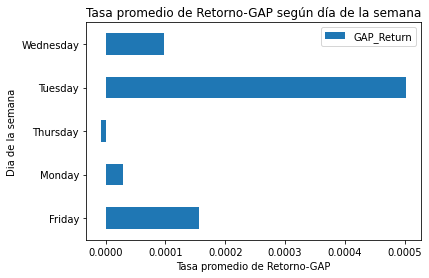

In [18]:
plt.figure(figsize=(10,10))
dia_inversion_gap.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según día de la semana')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Dia de la semana')
plt.show()

# Análisis del mejor día para invertir usando el rendimiento intradiario.
<b>Intra: Considera la diferencia entre el precio de cierre y el precio de apertura (escala logaritmica).

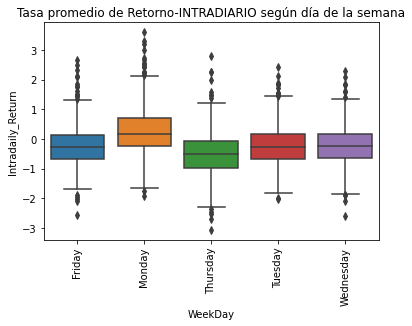

In [48]:
df_Retorno_Intra = df_global[['WeekDay','Ticker','Intradaily_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Intra.reset_index(inplace=True)
sns.boxplot(data =df_Retorno_Intra,x='WeekDay',y='Intradaily_Return')
plt.xticks(rotation=90)
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.show()

In [19]:
df_retorno_intra= pd.DataFrame()
df_retorno_intra=df_global[['WeekDay','Intradaily_Return']]
df_retorno_intra

,WeekDay,Intradaily_Return
0,Monday,-0.054285
1,Tuesday,0.042133
2,Wednesday,-0.012220
3,Thursday,-0.007161
4,Friday,-0.045061
...,...,...
5279,Thursday,0.007265
5280,Monday,0.005271
5281,Tuesday,0.017497
5282,Wednesday,-0.002281


In [20]:
dia_inversion_intra=df_retorno_intra.groupby(['WeekDay']).mean()
dia_inversion_intra

,Intradaily_Return
WeekDay,
Friday,-0.000215
Monday,0.000297
Thursday,-0.000456
Tuesday,-0.000232
Wednesday,-0.000206


<Figure size 720x720 with 0 Axes>

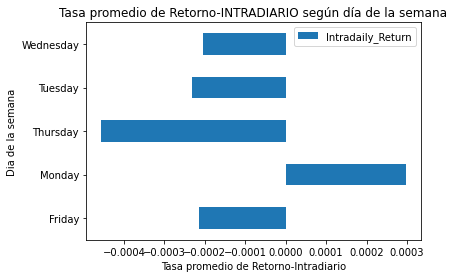

In [21]:
plt.figure(figsize=(10,10))
dia_inversion_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.xlabel('Tasa promedio de Retorno-Intradiario')
plt.ylabel('Dia de la semana')
plt.show()

In [24]:
df_simbolos=df_simbolos.rename({'Symbol': 'Ticker'},axis=1)
df_simbolos


,Ticker,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [25]:

df_global_ind= df_global.merge(df_simbolos, on='Ticker', how='left')
df_global_ind

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month,Security,GICS Sector,GICS Sub-Industry
0,2000-01-03,30.250000,32.406250,30.187500,31.937500,19.965698,6250200.0,ITW,0.000000,-0.054285,NaN,NaN,Monday,2000-01,Illinois Tool Works,Industrials,Industrial Machinery
1,2000-01-04,31.812500,31.843750,30.250000,30.500000,19.067045,2799600.0,ITW,-0.003922,0.042133,-0.045010,NaN,Tuesday,2000-01,Illinois Tool Works,Industrials,Industrial Machinery
2,2000-01-05,30.500000,31.125000,30.031250,30.875000,19.301485,2350800.0,ITW,0.000000,-0.012220,0.012296,NaN,Wednesday,2000-01,Illinois Tool Works,Industrials,Industrial Machinery
3,2000-01-06,30.437500,30.875000,30.250000,30.656250,19.164724,2038800.0,ITW,-0.014271,-0.007161,-0.007086,NaN,Thursday,2000-01,Illinois Tool Works,Industrials,Industrial Machinery
4,2000-01-07,31.187500,32.687500,31.125000,32.625000,20.395491,3213800.0,ITW,0.017181,-0.045061,0.064220,NaN,Friday,2000-01,Illinois Tool Works,Industrials,Industrial Machinery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658350,2020-12-24,66.309998,66.400002,65.250000,65.830002,65.830002,155900.0,HSIC,-0.001959,0.007265,-0.009181,44.326489,Thursday,2020-12,Henry Schein,Health Care,Health Care Distributors
2658351,2020-12-28,66.570000,66.900002,65.639999,66.220001,66.220001,420700.0,HSIC,0.011178,0.005271,0.005924,44.328314,Monday,2020-12,Henry Schein,Health Care,Health Care Distributors
2658352,2020-12-29,66.879997,66.989998,65.389999,65.720001,65.720001,336500.0,HSIC,0.009917,0.017497,-0.007551,44.331727,Tuesday,2020-12,Henry Schein,Health Care,Health Care Distributors
2658353,2020-12-30,65.690002,66.239998,65.110001,65.839996,65.839996,490100.0,HSIC,-0.000457,-0.002281,0.001826,44.323465,Wednesday,2020-12,Henry Schein,Health Care,Health Care Distributors


In [26]:
df_emp_r_gaps= pd.DataFrame()

df_emp_r_gaps=df_global_ind[['GICS Sector','GAP_Return']]
df_emp_r_gaps

,GICS Sector,GAP_Return
0,Industrials,0.000000
1,Industrials,-0.003922
2,Industrials,0.000000
3,Industrials,-0.014271
4,Industrials,0.017181
...,...,...
2658350,Health Care,-0.001959
2658351,Health Care,0.011178
2658352,Health Care,0.009917
2658353,Health Care,-0.000457


In [27]:
df_emp_r_gaps =df_emp_r_gaps.groupby(['GICS Sector']).mean()
df_emp_r_gaps = df_emp_r_gaps.sort_values('GAP_Return',ascending=True)
df_emp_r_gaps

,GAP_Return
GICS Sector,
Consumer Staples,-0.000083
Utilities,0.000011
Real Estate,0.000054
Industrials,0.000118
Financials,0.000120
Health Care,0.000156
Information Technology,0.000169
Materials,0.000224
Communication Services,0.000226


<Figure size 720x720 with 0 Axes>

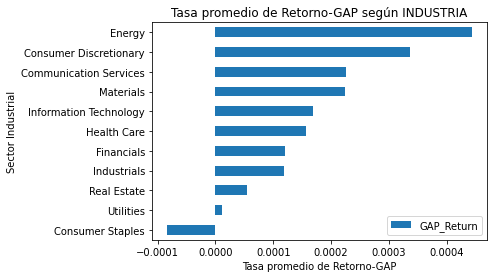

In [28]:
plt.figure(figsize=(10,10))
df_emp_r_gaps.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Sector Industrial')
plt.show()

In [29]:
df_emp_r_intra= pd.DataFrame()

df_emp_r_intra=df_global_ind[['GICS Sector','Intradaily_Return']]
df_emp_r_intra

,GICS Sector,Intradaily_Return
0,Industrials,-0.054285
1,Industrials,0.042133
2,Industrials,-0.012220
3,Industrials,-0.007161
4,Industrials,-0.045061
...,...,...
2658350,Health Care,0.007265
2658351,Health Care,0.005271
2658352,Health Care,0.017497
2658353,Health Care,-0.002281


In [30]:
df_emp_r_intra =df_emp_r_intra.groupby(['GICS Sector']).mean()
df_emp_r_intra = df_emp_r_intra.sort_values('Intradaily_Return',ascending=True)
df_emp_r_intra

,Intradaily_Return
GICS Sector,
Consumer Staples,-0.000354
Health Care,-0.000299
Industrials,-0.000242
Real Estate,-0.000206
Utilities,-0.000200
Information Technology,-0.000196
Financials,-0.000120
Consumer Discretionary,-0.000101
Materials,-0.000050


<Figure size 720x720 with 0 Axes>

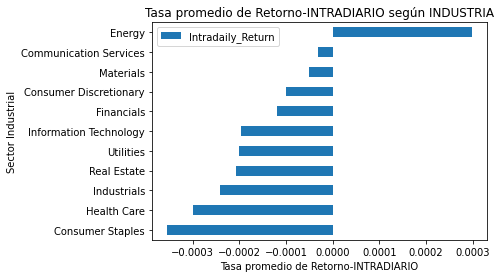

In [31]:
plt.figure(figsize=(10,10))
df_emp_r_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-INTRADIARIO')
plt.ylabel('Sector Industrial')
plt.show()

In [32]:
df_volatibilidades=pd.DataFrame
df_volatibilidades= df_global[['Year_Month','Volatility']]
df_volatibilidades = df_volatibilidades.sort_values('Volatility',ascending=False)
df_volatibilidades

,Year_Month,Volatility
2432,2009-09,214.222162
2431,2009-09,213.994089
2430,2009-09,213.990578
2435,2009-09,213.760658
2434,2009-09,213.593341
...,...,...
245,2000-12,NaN
246,2000-12,NaN
247,2000-12,NaN
248,2000-12,NaN


In [33]:
df_volatibilidades_por_periodo=df_volatibilidades.groupby(['Year_Month']).mean()
df_volatibilidades_por_periodo = df_volatibilidades_por_periodo.sort_values('Volatility',ascending=False)
df_volatibilidades_por_periodo

,Volatility
Year_Month,
2009-06,70.404261
2009-07,69.984872
2009-05,69.963381
2009-08,69.494807
2009-04,68.581948
...,...
2000-07,NaN
2000-08,NaN
2000-09,NaN


In [34]:
df_volatilidades_altas_periodos=df_volatibilidades_por_periodo.head(15)

In [35]:
df_volatilidades_altas_periodos

,Volatility
Year_Month,
2009-06,70.404261
2009-07,69.984872
2009-05,69.963381
2009-08,69.494807
2009-04,68.581948
2009-09,68.386643
2009-03,66.428754
2009-02,64.056834
2009-10,62.767799


<Figure size 720x720 with 0 Axes>

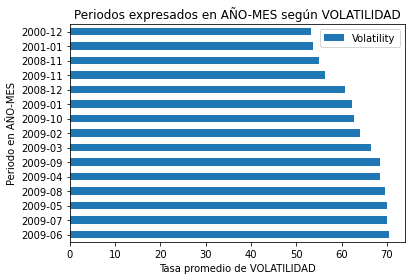

In [36]:
plt.figure(figsize=(10,10))
df_volatilidades_altas_periodos.plot.barh()
plt.title('Periodos expresados en AÑO-MES según VOLATILIDAD')
plt.xlabel('Tasa promedio de VOLATILIDAD')
plt.ylabel('Periodo en AÑO-MES')
plt.show()

In [ ]:
micro = yf.download('MSFT', start='2010-01-01')
micro.reset_index(inplace=True)
micro.head()

In [ ]:
micro.info()

In [ ]:
micro.tail(10)

In [ ]:
micro.info()

In [ ]:
msft = yf.Ticker("MSFT")

In [ ]:
msft.info

In [ ]:
msft.actions

In [ ]:
msft.calendar

In [ ]:
plt.figure(figsize=(12, 5))
f1 = plt.plot(micro_fil.Date, micro_fil['Adj Close'], c = 'k', ls = '-', lw = 1.5)
f1 = plt.plot(micro_fil.Date, micro_fil['SMA50'], c = 'k', ls = 'solid', lw = 0.5)
plt.xlabel('Tiempo')
plt.ylabel('Activo Microsoft')
plt.legend(['Precio', 'SMA 50'], loc = 'lower right', fontsize = 14)
plt.plot(micro_fil.Date, micro_fil['mPos'], '^',c='g')
plt.plot(micro_fil.Date, micro_fil['mneg'], 'v',c='r')
plt.show()

In [ ]:
retornos_gaps = np.log(aperturas/cierres.shift(1)).fillna(0)

retornos_intra = np.log(cierres/aperturas).fillna(0)

variaciones = activo.cierre_ajustado.pct_change()

volatilidad = activos.variaciones.rolling(250).std()*100*(250)**0.5 # (en este caso se puede utilizar el indice VIX)

In [ ]:
variaciones = micro.Adj_Close.pct_change()